In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
from scipy import stats
from my_cross_val import non_target_fold
from MyLDA import MyLDA

# load dataset
data = pd.read_csv('hw1_q4_dataset.csv', header=None).to_numpy()
X = data[:,:-1]
y = data[:,-1]

num_data, num_features = X.shape

# shuffle dataset
np.random.seed(2023)
perm = np.random.permutation(num_data)

X = X.tolist()
y = y.tolist()

X = [X[i] for i in perm]
y = [y[i] for i in perm]

X = np.array(X)
y = np.array(y)

# Split dataset into train and test sets
NUM_TRAIN = int(np.ceil(num_data*0.8))
NUM_TEST = num_data - NUM_TRAIN

X_train = X[:NUM_TRAIN]
X_test = X[NUM_TRAIN:]
y_train = y[:NUM_TRAIN]
y_test = y[NUM_TRAIN:]


ModuleNotFoundError: No module named 'my_cross_val'

In [1]:
def my_cross_val(model, loss_func, X, y, k=10):
    dataset = np.column_stack([X, y])
    split_data = []
    copy = list(dataset)
    size_each_fold = int(len(copy) / k)

    for i in range(k):
        fold = []
        while len(fold) < size_each_fold:
            index = random.randrange(len(copy))
            fold.append(copy.pop(index))
        split_data.append(fold)
    split_data = pd.DataFrame(split_data)
    split_data = split_data.transpose()
    #return split_data
    mse_by_fold = []
    err_rate_by_fold = []   
    for i in range(k):
        target_fold = split_data.iloc[:, i]
        df = np.empty((0, len(target_fold.iloc[0])))
        for j in range(target_fold.shape[0]):
            df = np.row_stack([df, target_fold.iloc[j]])
        df = pd.DataFrame(df)
        non_fold = non_target_fold(split_data.drop(split_data.columns[i], axis = 1))
        X_fold = df.iloc[:, :-1]
        X_fold = X_fold.to_numpy()
        y_fold = df.iloc[:, -1:]
        X_non_fold = non_fold.iloc[:, :-1]
        X_non_fold = X_non_fold.to_numpy()
        y_non_fold = non_fold.iloc[:, -1:]
        y_fold = y_fold.to_numpy()
        y_fold = y_fold.reshape((len(y_fold), ))
        y_non_fold = y_non_fold.to_numpy()
        y_non_fold = y_non_fold.reshape((len(y_non_fold), ))

        model.fit(X_non_fold, y_non_fold)
        if loss_func == 'mse':
            mse = np.mean((y_fold - model.predict(X_fold))**2)
            mse_by_fold.append(mse)
        elif loss_func == 'err_rate':
            y_hat = model.predict(X_fold)
            return y_hat
            #err_rate_bool = y_fold != y_hat
            #return err_rate_bool
            """"
            err_rate = sum(err_rate_bool)/len(y_fold)
            err_rate_by_fold.append(err_rate)
            return err_rate_by_fold
            """

In [4]:
x = my_cross_val(lda, 'err_rate', X, y)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [6]:
lambda_vals = np.arange(-0.01, 0.001, 0.001)
np.round(lambda_vals, 4)

array([-0.01 , -0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003,
       -0.002, -0.001, -0.   ])

In [2]:
test = MyLDA(-0.001)
test.fit(X_train, y_train)

In [3]:
pred, raw = test.predict(X_test)

In [13]:
what = X@w.T

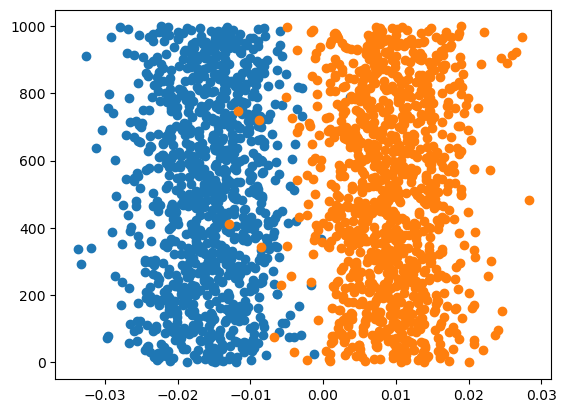

In [14]:
plt.scatter(what[np.where(y == 0)], range(0, len(what[np.where(y == 0)])))
plt.scatter(what[np.where(y == 1)], range(0, len(what[np.where(y == 1)])))
plt.show()

In [17]:
np.arange(-0.01, 0, 0.001)

array([-1.00000000e-02, -9.00000000e-03, -8.00000000e-03, -7.00000000e-03,
       -6.00000000e-03, -5.00000000e-03, -4.00000000e-03, -3.00000000e-03,
       -2.00000000e-03, -1.00000000e-03, -8.67361738e-18])

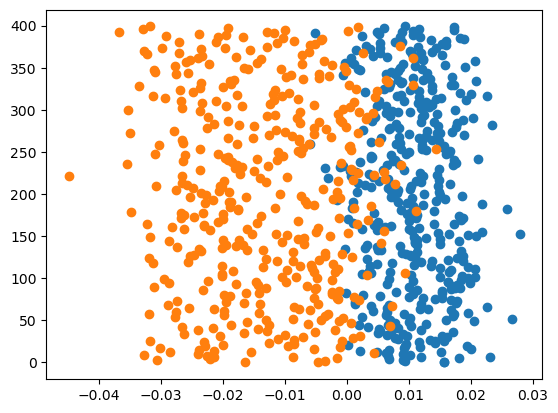

In [52]:
plt.scatter(result[:, 0], range(0, 400))
plt.scatter(result[:, 1], range(0, 400))
plt.show()

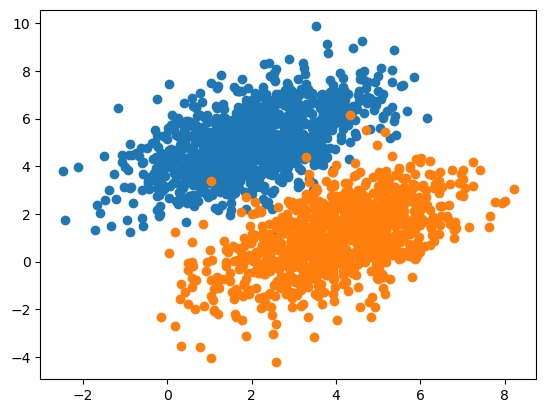

In [24]:
plt.scatter(X[np.where(y == 0), 0], X[np.where(y == 0), 1])
plt.scatter(X[np.where(y == 1), 0], X[np.where(y == 1), 1])
plt.show()


In [15]:
plt.scatter(what[np.where(y_test == 0)], what[np.where(y_test == 0)])
plt.scatter(what[np.where(y_test == 1)], what[np.where(y_test == 1)])
plt.plot([-0.01, 0.03], [0.013, -0.04])
plt.plot([0.02, 0.03], [-0.05, -0.02])
plt.grid()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed